<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Model" data-toc-modified-id="Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear regression</a></span><ul class="toc-item"><li><span><a href="#Prediction-error-=-Irreducible-error-$\oplus$-Bias-$\oplus$-Variance" data-toc-modified-id="Prediction-error-=-Irreducible-error-$\oplus$-Bias-$\oplus$-Variance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Prediction error = Irreducible error $\oplus$ Bias $\oplus$ Variance</a></span></li><li><span><a href="#The-test-variance" data-toc-modified-id="The-test-variance-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>The test variance</a></span></li></ul></li><li><span><a href="#Ridge-regression" data-toc-modified-id="Ridge-regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ridge regression</a></span><ul class="toc-item"><li><span><a href="#The-variance" data-toc-modified-id="The-variance-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The variance</a></span></li><li><span><a href="#The-bias" data-toc-modified-id="The-bias-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>The bias</a></span></li><li><span><a href="#Best-$\lambda$" data-toc-modified-id="Best-$\lambda$-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Best $\lambda$</a></span></li></ul></li><li><span><a href="#Principal-component-regression" data-toc-modified-id="Principal-component-regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Principal component regression</a></span></li><li><span><a href="#Set-the-lambda-as-the-optimal" data-toc-modified-id="Set-the-lambda-as-the-optimal-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Set the lambda as the optimal</a></span></li></ul></div>

# Model

* Input dimension (features):2
* $y =  x_1  + \epsilon$, $x_1 \in [0,1]$, $x_2 \in [0,2]$
* $\epsilon$ is following the uniform distribution $[-3/2,3/2]$

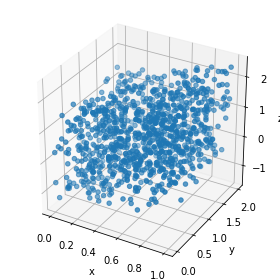

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

%matplotlib inline

x1_max = 1
x2_max = 2
rnd_max = 3

def f(X):
    return X[:,0]

sigma_epsilon = rnd_max/np.sqrt(12)

N_train=1000
def get_train(N=None, X_train=None):
    if X_train is None:
        X_train = np.random.rand(N, 2)
        X_train[:,0] = X_train[:,0] * x1_max
        X_train[:,1] = X_train[:,1] * x2_max

    y_train = f(X_train) + rnd_max*(np.random.rand(np.shape(X_train)[0]) - 0.5)
    return X_train, y_train

X_train, y_train = get_train(N=N_train)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(X_train[:,0], X_train[:,1], y_train)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.tight_layout()
plt.show()


# Linear regression

## Prediction error = Irreducible error $\oplus$ Bias $\oplus$ Variance
* Prediction error:
    * Irreducible error:
        * $\sigma_\epsilon$, $3\sqrt{1/12}$ for our data
    * Bias: 0
        * Model bias: 0 for our data and fit model
        * Estimation bias: 0 for our data and fit model

    * Variance
        * suqure root of the variance: $\sigma_\epsilon \sqrt{\text{df} / N}$, $N$ is the number of tranning data.


## The test variance


$\beta$ is given by
$$
\beta = (X^T X)^{-1} X^T y
$$

For the test data $X'$, the prediction is 
$$
y' = X' (X^T X)^{-1} X^T y
$$
The fluctuation is from $y$.

$$
\text{Var}(y') = \sum_i {\text{Var}(y_i')}  = \text{E}  [\epsilon^T  X   (X^T X)^{-1} {X'}^T  X (X^T X)^{-1} X^T \epsilon]
$$

$$
\text{Var}(y') = \text{E}[\text{Tr}( X   (X^T X)^{-1} {X'}^T  X' (X^T X)^{-1} X^T \epsilon \epsilon^T)]
$$

$$
\text{Var}(y') = \text{Tr}( X   (X^T X)^{-1} {X'}^T  X' (X^T X)^{-1} X^T)\sigma_\epsilon
$$

$$
\text{Var}(y') = \text{Tr}( (X^T X)^{-1} {X'}^T  X' ) \sigma_\epsilon
$$


If the test data and the tranning data have the same mean and variance then
$$
\sum_j \text{Var}(y'_j) =  \sigma^2_\epsilon \frac{N'}{N} \text{df}
$$

$\text{df}$ is the degree of freedoms, the number of features plus 1. $N'$ is the number of testing data. and $N$ is the number of tranning data.



In [35]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def get_test():
    x1_dense = np.linspace(0, x1_max, 100)
    x2_dense = np.linspace(0, x2_max, 100)
    XX,YY = np.meshgrid(x1_dense, x2_dense)
    X_test = np.c_[XX.ravel(), YY.ravel()]
    y_test_truth = f(X_test)
    y_test = y_test_truth + rnd_max*(np.random.rand(100*100) - 0.5)
    return X_test, y_test, y_test_truth

def simulate():


    N_repeat = 1000
    N_test = 100*100
    N_train=1000
    X_test, y_test, y_test_truth = get_test()
    X_train, y_train = get_train(N_train)

    yhat = np.zeros((N_repeat, N_test))

    for i in range(N_repeat):
        X_train, y_train = get_train(X_train=X_train)
        #print(X_train)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        yhat[i,:] = lr.predict(X_test)

    return X_train, X_test, yhat, y_test, y_test_truth


from IPython import display
def show(numbers):
        df = pd.DataFrame(columns=["","value"], data=numbers)
        display.display(df)

def make_table(X_train, X_test, yhat, y_test, y_test_truth):
    N_test = np.shape(y_test)[0]
    N_train = np.shape(X_train)[0]

    # expect over N_repeat
    err = yhat - y_test_truth
    irreduceble_error = (y_test - y_test_truth).std()
    average_prediction_error  = np.sqrt(np.square(err).mean(axis=1).mean())


    bias = np.sqrt(np.square(err.mean(axis=0)).mean())
    std = np.sqrt(err.var(axis=0).mean())

    numbers=[]
    numbers.append(["Irreducible error (theory)", sigma_epsilon])
    numbers.append(["Irreducible error (MC)", irreduceble_error])
    numbers.append(["Error compared to truth", average_prediction_error])
    numbers.append(["Bias", bias])
    numbers.append(["Model bias", 0.0])
    numbers.append(["Estimation bias",  bias])
    numbers.append(["Root of variance", std])
    numbers.append(["Bias + Root of variance",  (bias**2 +  std**2)**0.5])

    bias = np.sqrt(np.square(err.mean(axis=0)).mean())

    #X_train_=np.c_[X_train, np.ones(N_train).reshape(-1,1)]
    #X_test_=np.c_[X_test, np.ones(N_test).reshape(-1,1)]
    #correct_factor = np.linalg.inv(X_train_.T.dot(X_train_)).dot(X_test_.T.dot(X_test_)).trace()* N_train/N_test/3
    correct_factor = 1
    numbers.append(["Root of variance (theory)",  sigma_epsilon* np.sqrt(correct_factor*3/N_train)])

    show(numbers)



make_table(*simulate())

,,value
0,Irreducible error (theory),0.866025
1,Irreducible error (MC),0.870498
2,Error compared to truth,0.048651
3,Bias,0.001085
4,Model bias,0.000000
5,Estimation bias,0.001085
6,Root of variance,0.048638
7,Bias + Root of variance,0.048651
8,Root of variance (theory),0.047434


# Ridge regression
## The variance
In the ridge regression we firstly center the $X$ with $\overline{X}$.
In the following we will only use the variables after centering.
 $\beta$ is given by
$$
\beta = (X^T X + \lambda I)^{-1} X^T y
$$

For the test data $X'$ (centered with $\overline{X}$), the prediction is 
$$
y' = X' (X^T X + \lambda I)^{-1} X^T y + \frac{1}{N} \mathbf{1} y
$$

The fluctuation is from $y$.
If the test data and the tranning data $X$ have the same mean and variance, and SVD decomposition of $X$ is $X = U \Sigma V^T$, then

$$
\text{Var}(y'_\beta) = 
\sigma^2_\epsilon\frac{N^\prime}{N} \sum_i \left(\frac{d_i^2}{d_i^2 + \lambda}\right)^2 
$$

$$
\text{Var}{y'_b} = \sigma^2_\epsilon  \frac{N^\prime}{N} 
$$
the correlation term is 
$$
\text{Var}{y'_{b\beta}} = 0
$$


df' is effective the degree of freedoms (not same as the definition in the most text book, so we use a prime to distinguish them). $N'$ is the number of testing data. and $N$ is the number of tranning data.
It's obviously, increasing the $\lambda$ will reduce the df' and the variance.




## The bias

The $lambda$ will introduce bias. We can only estimate bias from the linear regression.

$$
\delta y' = X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y
$$

$$
\sum_j |\delta y'_j|^2 = Tr\left[(X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y)^{T} X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y\right]
$$

$$
\sum_j |\delta y'_j|^2 = Tr\left[  y^T X   (X^T X + \lambda I)^{-1} - (X^T X)^{-1}) X'^T X' ((X^T X + \lambda I)^{-1} - (X^T X)^{-1})  X^T y\right]
$$

If the test data and the tranning data $X$ have the same mean and variance, and SVD decomposition of $X$ is $X = U \Sigma V^T$, then

$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N} Tr\left[  y^T X  V ((\Sigma^T\Sigma + \lambda I)^{-1} - (\Sigma^T\Sigma)^{-1}) \Sigma^T\Sigma ((\Sigma^T\Sigma + \lambda I)^{-1} - (\Sigma^T\Sigma)^{-1}) V^T X^T y\right]
$$


$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N} Tr\left[  y^T U \text{diag}(\lambda^2 /(d_i^2 + \lambda)^2) U^T y\right]
$$
$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N} \sum_{i<p} \left(\frac{ \lambda }{d_i^2 + \lambda}\right)^2 (U^T y)_i^2
$$


## Best $\lambda$

we found for singular value $d_i$ the optimal value is at 
$$
\lambda_i = d_i^2\frac{\sigma_\epsilon^2}{(U^T y)_i^2} = \sigma_\epsilon^2/({\rm slope\,of\,ith\,component})
$$

and the minimum is 
$$
\sum_j |\delta y'_j|^2 = \frac{N^\prime}{N}\sum_i \frac{\sigma_\epsilon^2 (U^T y)_i^2} { \sigma_\epsilon^2 + (U^T y)_i^2}
$$


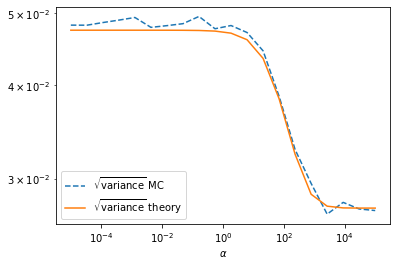

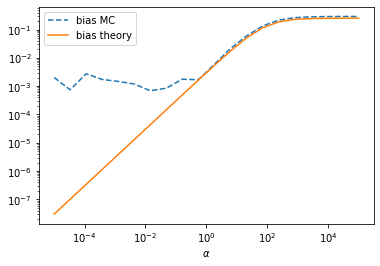

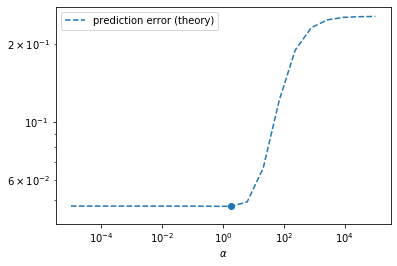

min  4.7E-02


In [40]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


N_repeat = 1000
N_test = 100*100
N_train=1000
X_test, y_test, y_test_truth = get_test()
X_train, y_train = get_train(N_train)

bias_ = []
std_ = []
std_theory = []
bias_theory = []

lambs = np.power(10, np.linspace(-5, 5, 20))

X_train_ = X_train - X_train.mean(axis=0)
y_train_ = y_train - y_train.mean()
y_train_truth = f(X_train)
y_train_truth_ = y_train_truth - y_train_truth.mean()

U,S,VT = np.linalg.svd(X_train_)

UTy = U[:,:2].T.dot(y_train_)

# should be same
#print(  S )
#print( UTy )
#print(  (UTy**2).sum() )
#print(  ( y_train_truth_ **2).sum() )


for lamb in lambs:
    yhat = np.zeros((N_repeat, N_test))
    for i in range(N_repeat):
        X_train, y_train = get_train(X_train=X_train)
        #print(X_train)
        lr = Ridge(alpha=lamb)
        lr.fit(X_train, y_train)
        yhat[i,:] = lr.predict(X_test)


    err = yhat - y_test_truth
    bias = np.sqrt(  (err.mean(axis=0)**2).mean()  )
    std = np.sqrt(err.var(axis=0).mean())
    bias_.append(bias)
    std_.append(std)

    df = ( (S**2/(S**2 + lamb))**2 ).sum()

    std_theory.append(sigma_epsilon * np.sqrt(   (df+1)/N_train   ))

    bias_theory.append(np.sqrt(  1/N_train *  (lamb**2/(S**2 + lamb)**2  *  UTy**2).sum()   ))




plt.plot(lambs, std_, label=r"$\sqrt{{\rm variance}}$ MC", linestyle="--")
plt.plot(lambs, std_theory, label=r"$\sqrt{{\rm variance}}$ theory")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel(r"$\alpha$")
plt.show()

plt.plot(lambs, bias_, label="bias MC", linestyle="--")
plt.plot(lambs, bias_theory, label="bias theory")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\alpha$")
plt.legend()
plt.show()

total = (np.array(std_theory)**2 + np.array(bias_theory)**2)**0.5
argmin = np.argmin(total)

plt.plot(lambs, total, label=r"prediction error (theory)", linestyle="--")
plt.scatter([lambs[argmin]], [total[argmin]])
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\alpha$")
plt.legend()
plt.show()

print("min % .1E"%total[argmin])


# Principal component regression

Let's assume $U^T \overline{y}$

$$
E[(U^T y)_i^2] = E[(U^T \epsilon)_i^2] = \sigma_\epsilon^2
$$


we can not really expect to find a component that $(U^Ty)_i \ll \sigma_\epsilon$.

Note for component $i$, the minimum variance is
$$
\frac{\sigma_c^2 (U^Ty)_i^2 }{ \sigma_c^2 + (U^Ty)_i^2   }
$$

So you can't effective reduce the variance without introduce new bias.

In this example, we are theating, we don't observe $U^T y \ll \sigma_\epsilon$, but we turn off the first component ($y$ axis), we know this will not introduce big bias (generally you can't). finally we obtain better result for many tranning data. but should not do the same in realy word data analysis.


In [59]:
def simulate(lambs=[1E10,0], seed=0):
    np.random.seed(seed)
    N_repeat = 1000
    N_test = 100*100
    N_train=1000
    X_test, y_test, y_test_truth = get_test()
    X_train, y_train = get_train(N_train)

    yhat = np.zeros((N_repeat, N_test))


    X_train_ = X_train - X_train.mean(axis=0)
    y_train_ = y_train - y_train.mean()

    U,S,VT = np.linalg.svd(X_train_, full_matrices=False)
    UTy = U[:,:2].T.dot(y_train_)
    
    lambs_ = lambs
    if lambs_ is None:
        lambs_ = (sigma_epsilon* S / UTy)**2
        
    S2inv = 1/(S*S+lambs_)


    for i in range(N_repeat):
        
        X_train, y_train = get_train(X_train=X_train)
        y_train_ = y_train - y_train.mean()

        beta =   VT.T.dot(  S2inv * S * U.T.dot(y_train_) )
        b = y_train.mean() - X_train.mean(axis=0).dot(beta)

        yhat[i,:] = X_test.dot(beta) + b



    N_test = np.shape(y_test)[0]
    N_train = np.shape(X_train)[0]

    # expect over N_repeat
    err = yhat - y_test_truth
    irreduceble_error = (y_test - y_test_truth).std()
    average_prediction_error  = np.sqrt(np.square(err).mean(axis=1).mean())


    bias = np.sqrt(np.square(err.mean(axis=0)).mean())
    std = np.sqrt(err.var(axis=0).mean())


    X_train_ = X_train - X_train.mean(axis=0)
    y_train_ = y_train - y_train.mean(axis=0)


    numbers=[]
    numbers.append(["Irreducible error (theory)", sigma_epsilon])
    numbers.append(["Irreducible error (MC)", irreduceble_error])
    numbers.append(["Error compared to truth", average_prediction_error])
    numbers.append(["Bias", bias])
    numbers.append(["Model bias", 0.0])
    numbers.append(["Estimation bias",  bias])
    numbers.append(["Root of variance", std])
    numbers.append(["Bias + Root of variance",  (bias**2 +  std**2)**0.5])


    numbers.append(["UTy",  UTy])
    numbers.append(["sigma",  sigma_epsilon])
    numbers.append(["lambda",  lambs_ ])
    numbers.append(["minimum variance",  np.sqrt(sigma_epsilon**2 * UTy**2/(UTy**2 + sigma_epsilon**2)) ])
    
    numbers.append(["Root of variance (theory)",  np.sqrt((sigma_epsilon**2 * UTy**2/(UTy**2 + sigma_epsilon**2)).sum() + sigma_epsilon**2)/np.sqrt(N_train)  ])
    numbers.append(["Bias (theory)",  np.sqrt(1/N_train * (UTy**2 * (lambs_/(lambs_+S**2))**2).sum()    )])


    show(numbers)

simulate([1E10,0])

,,value
0,Irreducible error (theory),0.866025
1,Irreducible error (MC),0.868773
2,Error compared to truth,0.0397723
3,Bias,0.00828435
4,Model bias,0
5,Estimation bias,0.00828435
6,Root of variance,0.0389
7,Bias + Root of variance,0.0397723
8,UTy,"[0.9106267926043101, 9.894685917248125]"
9,sigma,0.866025


# Set the lambda as the optimal

In [60]:
simulate(None)

,,value
0,Irreducible error (theory),0.866025
1,Irreducible error (MC),0.868773
2,Error compared to truth,0.0420072
3,Bias,0.00532714
4,Model bias,0
5,Estimation bias,0.00532714
6,Root of variance,0.0416681
7,Bias + Root of variance,0.0420072
8,UTy,"[0.9106267926043101, 9.894685917248125]"
9,sigma,0.866025
